# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
# Adjusting display options to prevent truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

I didn't find a fitting dataset to work with that is comparable to my dataset. I looked for GDP, Health indicators, justice, etc., but they were all to pay. I decided to use the oil database as a link to GDP. Oil usage in the world might give us a indication how GDP is evolving.

To compare it to my data sets I will use the same time frames 2015 to 2019.

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'SCrXcmqs-9MF3-tELFVX'

# Importing The World Agricultural Supply and Demand Estimates (WASDE) data, only the 'WHEAT_WORLD_19' World Wheat Supply and Use.

data = quandl.get_table('QDL/JODI',energy='OIL', date='2019-12-31,2019-11-30,2019-10-31,2019-09-30,2019-08-31,2019-07-31,2019-06-30,2019-05-31,2019-04-30,2019-03-31,2019-02-28,2019-01-31,2018-12-31,2018-11-30,2018-10-31,2018-09-30,2018-08-31,2018-07-31,2018-06-30,2018-05-31,2018-04-30,2018-03-31,2018-02-28,2018-01-31,2017-12-31,2017-11-30,2017-10-31,2017-09-30,2017-08-31,2017-07-31,2017-06-30,2017-05-31,2017-04-30,2017-03-31,2017-02-28,2017-01-31,2016-12-31,2016-11-30,2016-10-31,2016-09-30,2016-08-31,2016-07-31,2016-06-30,2016-05-31,2016-04-30,2016-03-31,2016-02-29,2016-01-31,2015-12-31,2015-11-30,2015-10-31,2015-09-30,2015-08-31,2015-07-31,2015-06-30,2015-05-31,2015-04-30,2015-03-31,2015-02-28,2015-01-31')

In [32]:
data.head()

,energy,code,country,date,value,notes
None,,,,,,
0,OIL,TPSDKT,ZAF,2019-12-31,-169.0000,3
1,OIL,TPSDKT,ZAF,2019-11-30,-195.0000,3
2,OIL,TPSDKT,ZAF,2019-10-31,-526.0000,3
3,OIL,TPSDKT,ZAF,2019-09-30,-592.0000,3
4,OIL,TPSDKT,ZAF,2019-08-31,-182.0000,3


In [5]:
data.shape

(10000, 6)

#### 2. Subsetting, wrangling, and cleaning time-series data

In [6]:
# Extracting unique values from the 'date' column
dates = data['date'].unique()

# Displaying the unique values
print(dates)

<DatetimeArray>
['2019-12-31 00:00:00', '2019-11-30 00:00:00', '2019-10-31 00:00:00',
 '2019-09-30 00:00:00', '2019-08-31 00:00:00', '2019-07-31 00:00:00',
 '2019-06-30 00:00:00', '2019-05-31 00:00:00', '2019-04-30 00:00:00',
 '2019-03-31 00:00:00', '2019-02-28 00:00:00', '2019-01-31 00:00:00',
 '2018-12-31 00:00:00', '2018-11-30 00:00:00', '2018-10-31 00:00:00',
 '2018-09-30 00:00:00', '2018-08-31 00:00:00', '2018-07-31 00:00:00',
 '2018-06-30 00:00:00', '2018-05-31 00:00:00', '2018-04-30 00:00:00',
 '2018-03-31 00:00:00', '2018-02-28 00:00:00', '2018-01-31 00:00:00',
 '2017-12-31 00:00:00', '2017-11-30 00:00:00', '2017-10-31 00:00:00',
 '2017-09-30 00:00:00', '2017-08-31 00:00:00', '2017-07-31 00:00:00',
 '2017-06-30 00:00:00', '2017-05-31 00:00:00', '2017-04-30 00:00:00',
 '2017-03-31 00:00:00', '2017-02-28 00:00:00', '2017-01-31 00:00:00',
 '2016-12-31 00:00:00', '2016-11-30 00:00:00', '2016-10-31 00:00:00',
 '2016-09-30 00:00:00', '2016-08-31 00:00:00', '2016-07-31 00:00:00',
 '20

In [7]:
# Extracting unique values from the 'country' column
countries = data['country'].unique()

# Displaying the unique values
print(countries)

['ZAF' 'YEM' 'VNM' 'VEN' 'USA' 'URY' 'UKR' 'TWN' 'TUR' 'TUN' 'TTO' 'TJK'
 'THA' 'SYR' 'SWZ' 'SWE' 'SVN' 'SVK' 'SUR' 'SLV' 'SGP' 'SDN' 'SAU' 'RUS'
 'ROU' 'QAT' 'PRY' 'PRT' 'POL' 'PNG' 'PHL' 'PER' 'PAN' 'OMN' 'NZL' 'NPL'
 'NOR' 'NLD' 'NIC' 'NGA' 'NER' 'MYS' 'MUS' 'MMR' 'MLT' 'MKD' 'MEX' 'MDA'
 'MAR' 'LVA' 'LUX' 'LTU' 'LBY' 'KWT' 'KOR' 'KAZ' 'JPN' 'JAM' 'ITA' 'ISL'
 'IRQ' 'IRN' 'IRL' 'IND' 'IDN' 'HUN' 'HTI' 'HRV' 'HND' 'HKG' 'GUY' 'GTM'
 'GRD' 'GRC' 'GNQ' 'GMB' 'GEO' 'GBR' 'GAB' 'FRA' 'FIN' 'EST' 'ESP' 'EGY'
 'ECU' 'DZA' 'DOM' 'DNK' 'DEU' 'CZE' 'CYP' 'CUB' 'CRI' 'COL' 'CHN' 'CHL'
 'CHE' 'CAN' 'BRN' 'BRB' 'BRA' 'BOL' 'BMU' 'BLZ' 'BLR' 'BHR' 'BGR' 'BGD'
 'BEL' 'AZE' 'AUT' 'AUS' 'ARM' 'ARG' 'ARE' 'ALB' 'AGO']


I will conduct the analysis on the USA 

In [8]:
# Extracting unique values from the 'country' column
codes = data['code'].unique()

# Displaying the unique values
print(codes)

['TPSDKT' 'TPSDKL']


And tacking the values on KL, kilo litter / KT= Kilo tons

In [9]:
#subsetting only the necessary information
data_USA = data[(data['country'] == 'USA') & (data['code'] == 'TPSDKL')][['date', 'value']]

In [10]:
#checking for output
data_USA.shape

(60, 2)

In [11]:
data_USA.head()

,date,value
None,,
7260,2019-12-31,1261.0903
7261,2019-11-30,1487.4177
7262,2019-10-31,2853.5114
7263,2019-09-30,2104.7868
7264,2019-08-31,1618.0926


In [12]:
#Checking for data type
print(data_USA['date'].dtype)
print(data_USA['value'].dtype)

datetime64[ns]
object


In [13]:
#changing the values to float
data_USA['value'] = pd.to_numeric(data_USA['value'], errors='coerce')

In [14]:
#Checking for data type
print(data_USA['date'].dtype)
print(data_USA['value'].dtype)

datetime64[ns]
float64


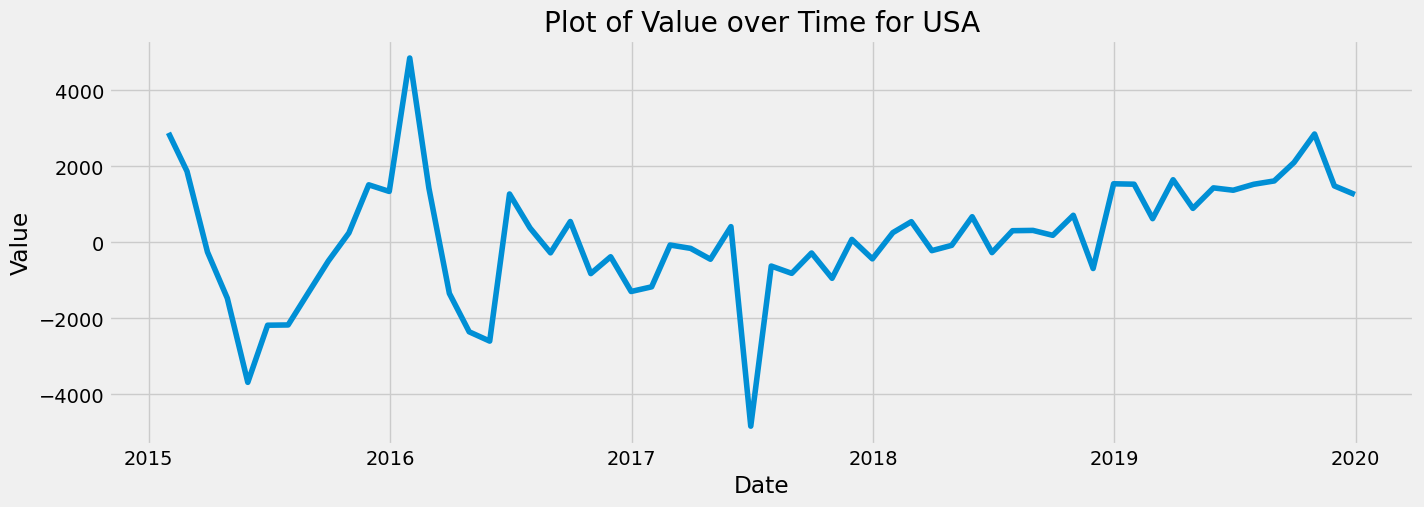

In [15]:
#plotting the initial data
plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data_USA['date'], data_USA['value'])

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Plot of Value over Time for USA')

plt.show()


At the first glance it looks like there is no overall trend affecting the data. This gives an indication that this data might be stationary. 

#### Cleaning of the data 

In [16]:
data_USA.head()

,date,value
None,,
7260,2019-12-31,1261.0903
7261,2019-11-30,1487.4177
7262,2019-10-31,2853.5114
7263,2019-09-30,2104.7868
7264,2019-08-31,1618.0926


In [17]:
# Reset index so that you can use the "Date" column as a filter

data_USA_reset = data_USA.reset_index()

In [18]:
data_USA_reset.head()

,None,date,value
0,7260,2019-12-31,1261.0903
1,7261,2019-11-30,1487.4177
2,7262,2019-10-31,2853.5114
3,7263,2019-09-30,2104.7868
4,7264,2019-08-31,1618.0926


In [19]:
#Dropping the row number from original dataframe
data_USA_reset.drop(['None'], axis=1, inplace=True)

In [20]:
data_USA_reset.head()

,date,value
0,2019-12-31,1261.0903
1,2019-11-30,1487.4177
2,2019-10-31,2853.5114
3,2019-09-30,2104.7868
4,2019-08-31,1618.0926


In [21]:
data_USA_reset.set_index('date', inplace=True)  # Set the "date" column as the index of the dataframe.
data_USA_reset.head()

,value
date,
2019-12-31,1261.0903
2019-11-30,1487.4177
2019-10-31,2853.5114
2019-09-30,2104.7868
2019-08-31,1618.0926


In [23]:
# Check for missing values (you shouldn't have any)

data_USA_reset.isnull().sum() 

value    0
dtype: int64

In [25]:
# Check for duplicates

dups = data_USA_reset.duplicated()
dups.sum()

0

No missing no dupls! 

### 3. Time-series analysis: decomposition

In [26]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_USA_reset, model='additive')

In [27]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

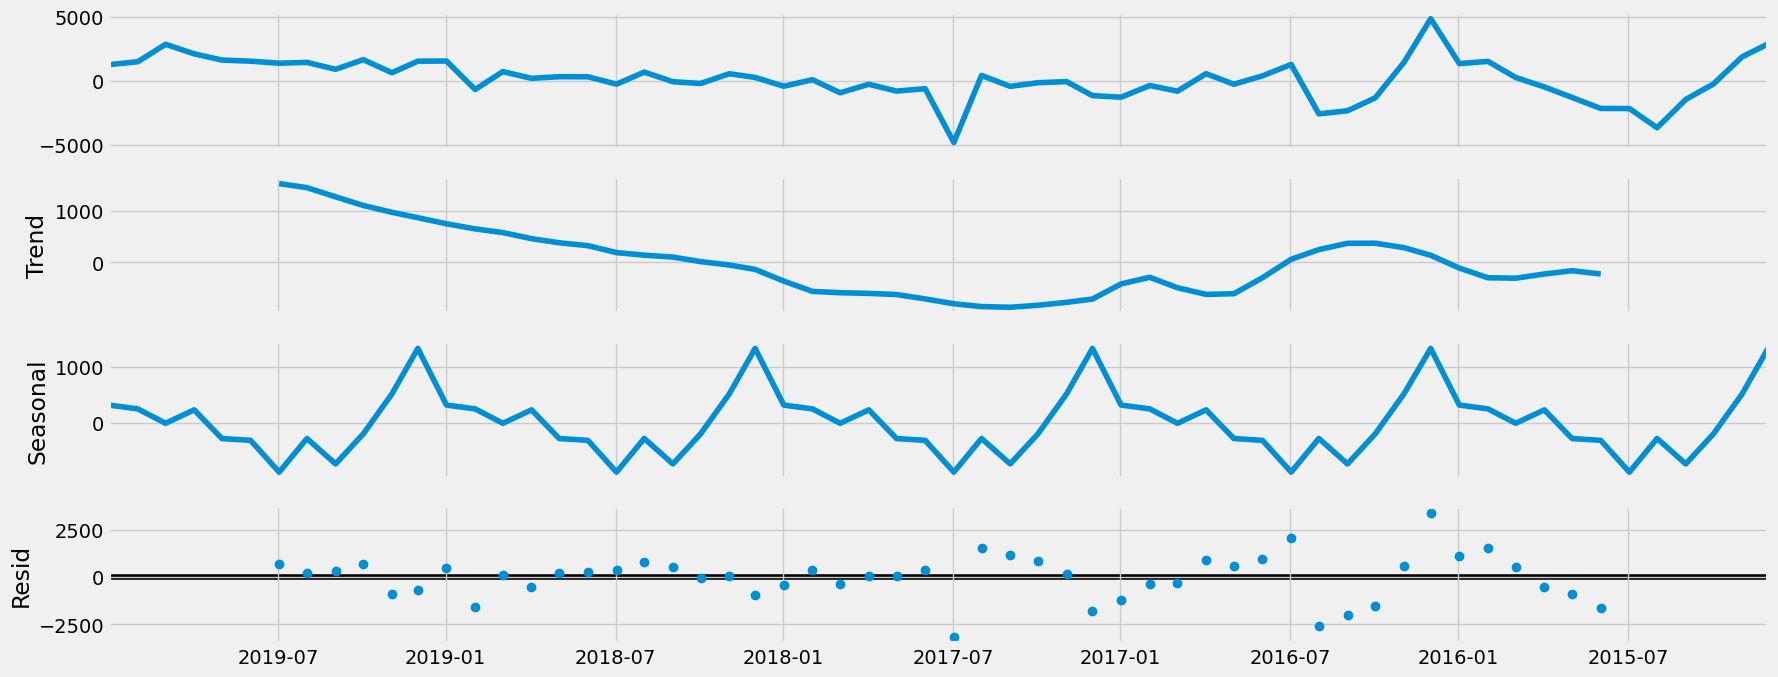

In [28]:
# Plot the separate components

decomposition.plot()
plt.show()

There is a bit of noise in this data. In the residual chart above we see that the dots don't align with the line. 

### 4. Testing for stationarity

In [30]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_USA_reset['value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.966465
p-value                         0.001597
Number of Lags Used             0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


The test statistic (-3.966465) is more negative than all the critical values this indicates strong evidence against the null hypothesis.

The p-value (0.001597) is less than the Critical Value 0,05 (5%), suggesting strong evidence against the null hypothesis.

Therefore, based on the low p-value and the test statistic being smaller than any of the critical values, we can reject the null hypothesis of a unit root. 

This suggests that the time series is stationary.

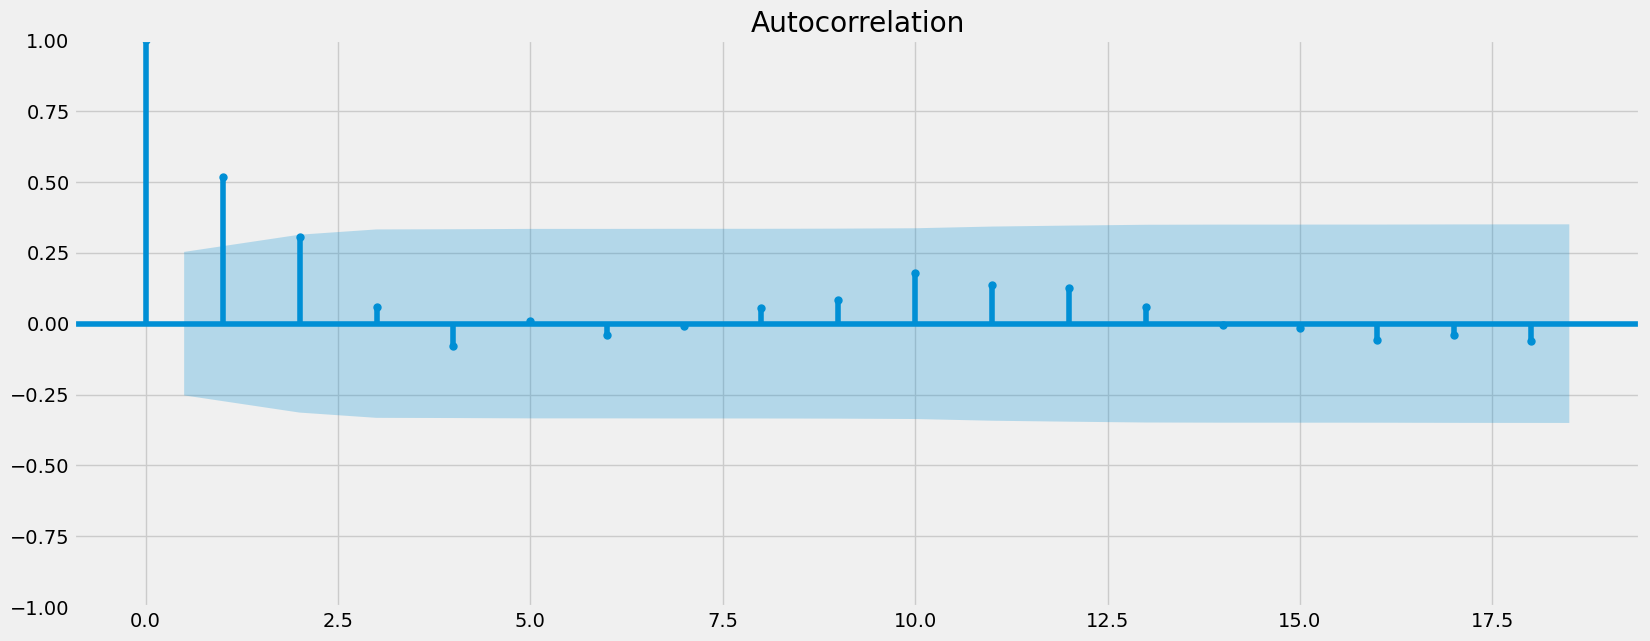

In [31]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_USA_reset)
plt.show()

In [ ]:
I conducted the autocorrelation test just to see the graph, almost all lags are within the confidence interval. 